<a href="https://colab.research.google.com/github/mihneaciorica/Market-Discovery-Challenge/blob/main/Market_Discovery_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
#Installing dependencies
!pip install --upgrade pyarrow

!pip install fastparquet

!pip install seaborn

!pip install streamlit

!pip install openai

!pip install fuzzywuzzy
import openai
from types import TracebackType
import pyarrow.parquet as pq
import pandas as pd
import os
import subprocess
import streamlit as st
import seaborn as sns
import matplotlib.pyplot as plt
from fuzzywuzzy import fuzz



/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


Marketing Challenge

#Reading the data


In [2]:


os.chdir('/content/drive/MyDrive/Colab Notebooks/')
os.getcwd()

#Needed the subprocess to check the upload status of the dataset since I was getting an error regarding corrupt parquet file
#result=subprocess.run(['ls' ,'-lh'],capture_output=True, text=True)
#print(result.stdout)


# Read the Parquet file
table = pd.read_parquet('company-data-general-info.snappy.parquet',engine='fastparquet')

# Convert to a Pandas DataFrame -- not necessary anymore since we're using the fastparquet engine
#df = table.to_pandas()

# Perform operations on the DataFrame
print(table.head())


                           soleadify_id                           veridion_id  \
0  015f5bf0-0326-11ec-86c4-11061f524d5f  015f5bf0-0326-11ec-86c4-11061f524d5f   
1  0197f351-0028-11ec-96f6-3549fd2a32c9  0197f351-0028-11ec-96f6-3549fd2a32c9   
2  01ba9030-cd00-11eb-9e6f-71c672115f33  01ba9030-cd00-11eb-9e6f-71c672115f33   
3  01f242e2-93e5-11eb-be5a-4f810ab55f2e  01f242e2-93e5-11eb-be5a-4f810ab55f2e   
4  01f43623-0b6f-11ec-a720-c144e265b048  01f43623-0b6f-11ec-a720-c144e265b048   

              company_name                company_legal_names  \
0        Anugrah Esa Mulia                               None   
1        Bonus Entreprises                               None   
2         Plaza De La Raza  [Child Development Services Inc.]   
3  Industrial Realty Group     [Industrial Realty Group LLC.]   
4       Elizabeth de Trejo                               None   

                            company_commercial_names main_country_code  \
0                                [Anugrah Esa Mu

In [3]:
# Getting an overview of the columns
print(table.columns)

Index(['soleadify_id', 'veridion_id', 'company_name', 'company_legal_names',
       'company_commercial_names', 'main_country_code', 'main_country',
       'main_region', 'main_city_district', 'main_city', 'main_postcode',
       'main_street', 'main_street_number', 'main_latitude', 'main_longitude',
       'locations', 'num_locations', 'company_type', 'year_founded',
       'employee_count', 'estimated_revenue', 'short_description',
       'long_description', 'business_tags', 'business_model', 'product_type',
       'naics_vertical', 'primary_naics6_code', 'primary_naics6_label',
       'secondary_naics6_codes', 'secondary_naics6_labels',
       'aggregated_sector', 'aggregated_industry', 'main_business_category',
       'main_industry', 'main_sector', 'website_url', 'website_domain',
       'website_tld', 'website_language_code', 'facebook_url', 'twitter_url',
       'instagram_url', 'linkedin_url', 'ios_app_url', 'android_app_url',
       'youtube_url', 'tiktok_url', 'cms', 'alexa_r

Displaying basic info about the table


In [4]:
print(table.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472376 entries, 0 to 1472375
Data columns (total 68 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   soleadify_id                  1472376 non-null  object        
 1   veridion_id                   1472376 non-null  object        
 2   company_name                  1472376 non-null  object        
 3   company_legal_names           1034420 non-null  object        
 4   company_commercial_names      1472376 non-null  object        
 5   main_country_code             1472376 non-null  object        
 6   main_country                  1472305 non-null  object        
 7   main_region                   1441684 non-null  object        
 8   main_city_district            507794 non-null   object        
 9   main_city                     1447178 non-null  object        
 10  main_postcode                 1316259 non-null  object        
 11

In [5]:
print(table.dtypes)

soleadify_id                 object
veridion_id                  object
company_name                 object
company_legal_names          object
company_commercial_names     object
                             ...   
website_number_of_pages     float64
website_external_links       object
website_technical_issues     object
seo_score                    object
seo_issues                   object
Length: 68, dtype: object


In [9]:
#table.head().to_csv('table.txt', sep='\t', index=False) not needed as no computational power for this

#Cleaning the data


1. Dropping unnecessary columns , but keeping them separately at the same time in order to retrieve them if necessary later

In [6]:
print(table.columns)

columns_to_drop=['soleadify_id', 'veridion_id','company_legal_names','company_commercial_names', 'main_country_code','main_city_district','main_postcode',
       'main_street', 'main_street_number','locations','naics_vertical', 'primary_naics6_code', 'primary_naics6_label',
       'secondary_naics6_codes', 'secondary_naics6_labels',
       'aggregated_sector', 'website_url', 'website_domain',
       'website_tld', 'website_language_code', 'facebook_url', 'twitter_url',
       'instagram_url', 'linkedin_url', 'ios_app_url', 'android_app_url',
       'youtube_url', 'tiktok_url', 'cms', 'alexa_rank', 'technologies',
       'sics_codified_industry', 'sics_codified_industry_code',
       'sics_codified_subsector', 'sics_codified_subsector_code',
       'sics_codified_sector', 'sics_codified_sector_code', 'sic_codes',
       'sic_labels', 'ibc_insurance_labels', 'ibc_insurance_codes',
       'created_at', 'last_updated_at', 'website_number_of_pages',
       'website_external_links', 'website_technical_issues', 'seo_score',
       'seo_issues']

# Keeping a copy so that we can retrive information from the dropped collumns later
parallel_table=table.copy()

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html --Dropping columns according to docs

table.drop(columns_to_drop,axis=1,inplace=True)

# Recheck table

print(table.info())



Index(['soleadify_id', 'veridion_id', 'company_name', 'company_legal_names',
       'company_commercial_names', 'main_country_code', 'main_country',
       'main_region', 'main_city_district', 'main_city', 'main_postcode',
       'main_street', 'main_street_number', 'main_latitude', 'main_longitude',
       'locations', 'num_locations', 'company_type', 'year_founded',
       'employee_count', 'estimated_revenue', 'short_description',
       'long_description', 'business_tags', 'business_model', 'product_type',
       'naics_vertical', 'primary_naics6_code', 'primary_naics6_label',
       'secondary_naics6_codes', 'secondary_naics6_labels',
       'aggregated_sector', 'aggregated_industry', 'main_business_category',
       'main_industry', 'main_sector', 'website_url', 'website_domain',
       'website_tld', 'website_language_code', 'facebook_url', 'twitter_url',
       'instagram_url', 'linkedin_url', 'ios_app_url', 'android_app_url',
       'youtube_url', 'tiktok_url', 'cms', 'alexa_r

2. After having reduced the initial table to 20 columns, will drop the rows that have NaN values.

In [7]:
print(table.isna().sum())

company_name                   0
main_country                  71
main_region                30692
main_city                  25198
main_latitude             438223
main_longitude            438223
num_locations                  0
company_type                2593
year_founded              424026
employee_count            552764
estimated_revenue         951974
short_description            106
long_description           14403
business_tags              18770
business_model                 0
product_type                   0
aggregated_industry            0
main_business_category         0
main_industry                  0
main_sector               503839
dtype: int64


We can see that there are a lot of of NaN values for key features, like the employee_count and estimated_revenue. Supposing that we would still get other information like business_tags or any kind of descrition about the companies in question, this would still be insufficient in order to determine if the give company could perform well in the region  . So will have to drop those rows.

In [36]:
table.dropna(subset=['main_latitude','main_longitude','year_founded','employee_count','estimated_revenue','long_description','main_sector','business_tags'],inplace=True)

In [42]:
# Let's check again the sum of NaN values

print(table.isna().sum())

table.reset_index(drop=True,inplace=True)

print(table.index)

company_name                 0
main_country                 8
main_region               1408
main_city                   12
main_latitude                0
main_longitude               0
num_locations                0
company_type                76
year_founded                 0
employee_count               0
estimated_revenue            0
short_description           12
long_description             0
business_tags                0
business_model               0
product_type                 0
aggregated_industry          0
main_business_category       0
main_industry                0
main_sector                  0
dtype: int64
RangeIndex(start=0, stop=183823, step=1)


Although there are still a lot of missing values for main_sector, will keep it like this and will base further analysis on main_business_category and business_tags

In [10]:
#Dislaying an example

for column in table.columns:
  print(table[column].name,'---',table[column][1])

company_name --- Tyfone
main_country --- United States
main_region --- Oregon
main_city --- Portland
main_latitude --- 45.484375
main_longitude --- -122.67596435546875
num_locations --- 1.0
company_type --- Private
year_founded --- 2004.0
employee_count --- 19.0
estimated_revenue --- 78500000.0
short_description --- At Tyfone, we understand that an elegant, engaging, intuitive user experience is the minimum requirement for any digital banking provider in today's market.
long_description --- At Tyfone, we understand that an elegant, engaging, intuitive user experience is the minimum requirement for any digital banking provider in today's market. What differentiates us is our unwavering commitment to exceptional collaboration and communication. We consider each customer a true partner and place the highest value on every relationship.
business_tags --- ['Mobile Banking', 'Partner Ecosystem', 'FinTech', 'Software Security', 'Cloud Engineers', 'Digital Banking Solutions', 'Digital Banking'

#3. EDA

1.Let's display a scatterplot of the estimated_revenue against the number of emploayees


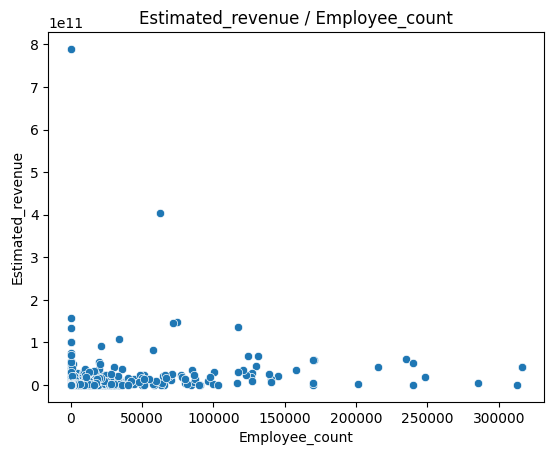

2023-07-09 09:31:23.259 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

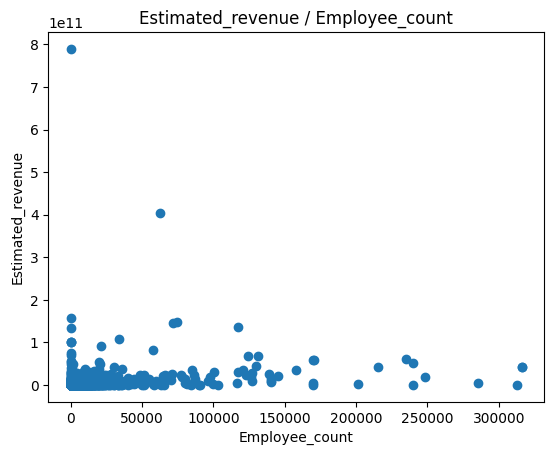

In [11]:


#Obviously not a great ideea for such a dataset, but at least will see the outliers and we can see the boundaries for the user input later on
sns.scatterplot(x=table['employee_count'],y=table['estimated_revenue'])

plt.title('Estimated_revenue / Employee_count')

plt.xlabel('Employee_count')

plt.ylabel('Estimated_revenue')

plt.show()


# Create another one with streamlit
fig, ax = plt.subplots()
ax.scatter(x=table['employee_count'],y=table['estimated_revenue'])


ax.set_title('Estimated_revenue / Employee_count')
ax.set_xlabel('Employee_count')
ax.set_ylabel('Estimated_revenue')

# Display the plot using Streamlit
st.pyplot(fig)

We could further reduce the data to companies having less than 50000 employees, and do a separate notebook for the big companies

# We'll display streamlit plots once we find the neighbors of the given company . We'll focus for the moment on getting more insight of our data


In [ ]:
#Don't run this it will break everything
#sns.pairplot(table)
#plt.show()

#Histogram of the entire dataset will not execute quickly...
#sns.histplot(data=table, x="estimated_revenue", kde=True)

In [59]:
# Need to export a list with no duplicates of the aggregated_answers
list_of_aggregated_industry=pd.unique(table['aggregated_industry'].values).tolist()

#We'll now do the same for the business_tags

exploded=table['business_tags'].explode()

list_of_unique_business_tags=exploded.unique().tolist()

print(len(list_of_unique_business_tags))  #got 176104 unique business_tags


155095


In [60]:
def generate_clean_answer(prompt):
    base_prompt = "\n Context:  Please make sense out of the following text : "
    full_prompt = f"{base_prompt} {prompt}.  Rewrite it if needed . In case you can not make any sense out of it or if it does not ressemble at all to a \
    company description, simply print out the digit 0"
    response = openai.Completion.create(
        engine="text-davinci-003",
        prompt=full_prompt,
        temperature=0.7,
        max_tokens=200,
        n=1,
        stop=None,
    )

    conclusion = response.choices[0].text.strip()
    return conclusion

def similar_aggregated_industry(prompt,list_of_aggregated_industry):

    full_prompt = f"Please find if the following word or expression : {prompt} exist in this list: {list_of_aggregated_industry} . In case they match , return the {prompt} only \
    , otherwise return a similar element from the list. Do not add other words, simply return eithr the {prompt} or the similar element from the list on a new line. In case \
    you can not find the {prompt} in the list or any other similar element, then simply print out the digit 0. "
    response = openai.Completion.create(
        engine="text-davinci-003",
        prompt=full_prompt,
        temperature=0.7,
        max_tokens=200,
        n=1,
        stop=None,
    )

    conclusion = response.choices[0].text.strip()
    return conclusion

def similar_business_tags(prompt,list_of_unique_business_tags):

    full_prompt = f"Search for the  {prompt},  this list: {list_of_unique_business_tags} . Each time perform a binary search. In case there is a match , return the {prompt} only \
    , otherwise return a similar element from the list. Do not add other words, simply return either the element or the elements that matched or the similar elements from {list_of_unique_business_tags} on a new line. In case \
    you can not find the {prompt} in the list or any other similar element, then simply print out the digit 0. "
    response = openai.Completion.create(
        engine="text-davinci-003",
        prompt=full_prompt,
        temperature=0.7,
        max_tokens=200000,
        n=1,
        stop=None,
    )

    conclusion = response.choices[0].text.strip()
    return conclusion


In [61]:
import re

def user_input():

  #We'll save all the answers in a dict
  answers={}
  # For the estimated revenue the initial type in the data set is float64, but will match against any number between 1 and 400000 since this is the max
  employee_count=input('\nPlease enter the number of employees of your company. It is ok to enter long text but i will extract only the first number')
  employee_count=re.findall(r'\b([1-9]\d{0,4}|400000)\b', employee_count)


  try:
    answers['employee_count']=employee_count[0]

  except:
    print('The input does not contain any number. We have to start again')
    user_input()

  # For the estimated revenue the initial type in the data set is float64
  estimated_revenue=input('\nPlease enter the estimated_revenue of your company. It is ok to enter long text, but i will extract only the first number...')
  estimated_revenue=re.findall(r'[0-9]+\.?[0-9]+', estimated_revenue)

  try:
    answers['estimated_revenue']=estimated_revenue[0]

  except:
    print('The input does not contain any number. We have to start again')
    user_input()


  short_description=input('\nPlease enter a short description of your company. Try to be as clear as possible , if not possible that\'s ok , I\'ll try to understand you')


  try:
    if generate_clean_answer(short_description)!=0:
      answers['short_description']=generate_clean_answer(short_description)
      print(generate_clean_answer(short_description))
  except:
    print('Something went wrong...will start again')
    user_input()


  aggregated_industry=input('Please enter the industry or industries in which your company is operating')

  try:
    if similar_aggregated_industry(aggregated_industry,list_of_aggregated_industry)!=0:
      answers['aggregated_industry']=similar_aggregated_industry(aggregated_industry,list_of_aggregated_industry)
      #print(similar_aggregated_industry(aggregated_industry,list_of_aggregated_industry))
  except:
    print('Something went wrong...will start again')
    user_input()

  business_tags=input('Please enter your main  business tag of your company')

  answers['business_tags']=business_tags

  geographical_position=input('Please input the latitude and longitude separated by a space')

  latitude,longitude= tuple(str(item) for item in geographical_position.split(' '))

  answers['latitude']=latitude

  answers['longitude']=longitude

  return answers




Possible to use openAI in order to search if the business_tags are in the list
of business_tags

"""
    if similar_business_tags(business_tags,list_of_unique_business_tags)!=0:
      answers['business_tags']=similar_business_tags(business_tags,list_of_unique_business_tags)
      print(similar_business_tags(business_tags,list_of_unique_business_tags))
  except:
    print('Something went wrong...will start again')
    user_input()    
"""

# Main()

Finding similar companies to the given one (problem states that we are given a company and will ask the user to input the number of employees, the estimated_revenue, a short_description, and the aggregated_industry)



In [76]:
#we retrive the similar points from the same geographical region
my_company= user_input

def search_similar_companies() :




  # now we apply k-Nearest Neighbors, but better MinHash or Jaccard Similarity

  similar_companies=table[(table.apply(lambda row: fuzz.ratio(row['business_tags'], my_company['business_tags'])) > 50) &
                          (table.apply(lambda row: fuzz.ratio(row['latitude'], my_company['latitude'])) > 90) &
                          (table.apply(lambda row: fuzz.ratio(row['longitude'], my_company['longitude'])) > 90)]

  return similar_companies

similar_companies = search_similar_companies()

def compare_similar_companies(my_company,similar_companies):

    full_prompt = f"Compare {my_company} to the other {similar_companies} and explain if my_company could acquire other business_tags "
    response = openai.Completion.create(
        engine="text-davinci-003",
        prompt=full_prompt,
        temperature=0.7,
        max_tokens=2000,
        n=1,
        stop=None,
    )

    conclusion = response.choices[0].text.strip()
    return conclusion

compare_similar_companies(my_company,similar_companies)


KeyError: ignored